# Visualisation Word Embeddings

* Recommended reading:  
https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
* Most of this code is based on a git repository for original code please see:  
https://github.com/sismetanin/word2vec-tsne/blob/master/Visualizing%20Word2Vec%20Word%20Embeddings%20using%20t-SNE.ipynb

In [2]:
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api
import gensim

import os
from glob import glob
import numpy as np
from sklearn.manifold import TSNE
from keras.preprocessing.text import text_to_word_sequence

from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import tempfile
import imageio
import shutil

Using TensorFlow backend.


In [3]:
# pretrained_model = api.load('word2vec-google-news-300')
# pretrained_model.save('pretrained.model')


In [4]:
pretrained_model = KeyedVectors.load("pretrained.model")
trained_model = KeyedVectors.load("trained_model")

In [25]:
list_of_words1 = [ 'queen', 'king']
list_of_words2 = [ 'love', 'peace', 'war' ]
list_of_words3 = [ "gay", "wow", "prithee"]
list_of_words4 = [ "Jew", "Catholic", "Protestant"]
list_of_listswords  = [list_of_words1, list_of_words2, list_of_words3, list_of_words4]

In [29]:
corpus = glob("corpus/*txt*") 
#preprocessing of data
data = [text_to_word_sequence(open(text).read(), lower=False ) for text in corpus]

small_model=Word2Vec(data, size=300, window=2, min_count=1, sg=1,negative=5, max_vocab_size=100)

# Plot your Word Embeddings

In [14]:
def get_embeddings(model, dim):
    
    embeddings= [model[word] for word in model.wv.vocab]
    words = [word for word in model.wv.vocab]

    tsne = TSNE(perplexity=50, n_components=dim, init='pca', n_iter=3500)
    fitted_tsne = tsne.fit_transform(embeddings)
    
    if dim==2:
        x_values = [value[0] for value in fitted_tsne]
        y_values= [value[1] for value in fitted_tsne]
        return embeddings, words, tsne, fitted_tsne, x_values, y_values
    elif dim==3:
        x_values = [value[0] for value in fitted_tsne]
        y_values=  [value[1] for value in fitted_tsne]
        z_values = [value[2] for value in fitted_tsne]
        return embeddings, words, tsne, fitted_tsne, x_values, y_values, z_values

## Visualise in a 2d vector space

In [15]:
def visualise_word_embeddings_2d(model, fname, title, annotation=False):

    embeddings, words, tsne, fitted_tsne, x_values, y_values= get_embeddings(model, 2)

    vocab_size= len(x_values)

    plt.figure(figsize=(12, 4)) 
    plt.grid(True)
    for idx in range(vocab_size):
        plt.scatter(x_values[idx],y_values[idx], alpha=0.7)
        if annotation:
            plt.annotate(words[idx],
                         xy=(x_values[idx], y_values[idx]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')
    plt.title(title)         
    plt.savefig(str(fname) + ".png", format='png', dpi=150)
    plt.show()
    


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


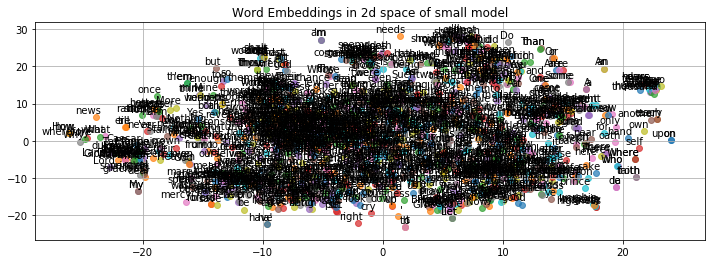

In [14]:
visualise_word_embeddings_2d(small_model, "small_model_2d", "Word Embeddings in 2d space of small model", True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


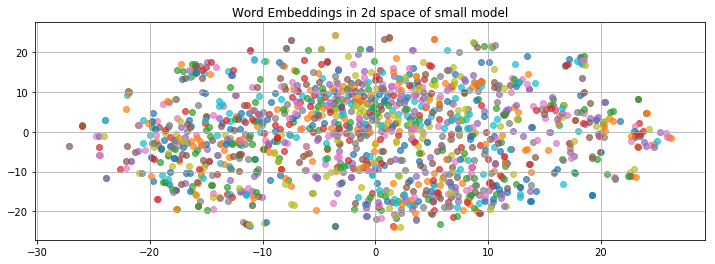

In [15]:
visualise_word_embeddings_2d(small_model, "without_anno_small_model_2d", "Word Embeddings in 2d space of small model")

## Visualise in a 3 dimensional vestor space

In [16]:
def visualise_word_embeddings_3d(model, fname, title):

    embeddings, words, tsne, fitted_tsne, x_values, y_values, z_values= get_embeddings(model, 3)

    vocab_size=len(x_values)

    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111, projection='3d')
    for idx in range(vocab_size):
        plt.scatter( x_values[idx], y_values[idx], z_values[idx], alpha=0.7)
    plt.title("Word Embeddings in 3d")
    plt.savefig(str(fname) + ".png", format='png', dpi=150)
    
    return plt.show()
        


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


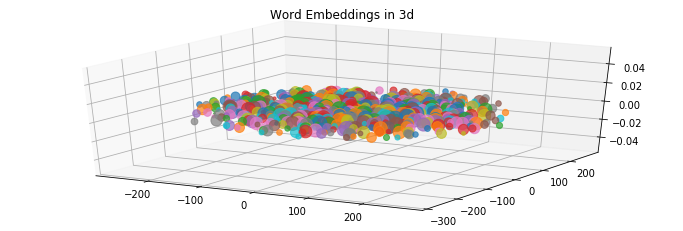

In [17]:
visualise_word_embeddings_3d(small_model, "3d_small_model", "Word Embeddings in 3d space of small model")

## Clusters of word embeddings

In [22]:
def get_clusters(list_of_words, model):
    embedding_clusters = []
    word_clusters = []
    
    for word in list_of_words:
        embeddings = [model[sim_word[0]] for sim_word in model.wv.most_similar(word, topn=5)] 
        sim_words = [sim_word[0] for sim_word in model.wv.most_similar(word, topn=5)]
        embedding_clusters.append(embeddings)
        word_clusters.append(sim_words)

    embedding_clusters = np.array(embedding_clusters)
    tsne_model = TSNE(perplexity=47, n_components=2, init='pca', n_iter=2500)
    x_values, y_values, z_values = embedding_clusters.shape
#     final_embeddings = np.array(tsne_model.fit_transform(embedding_clusters.reshape(x_values * y_values, z_values))).reshape(x_values, y_values, 2)
    
    return embedding_clusters, word_clusters 

In [39]:
def plot_similar_words(list_of_lists_words, model, title, fname):
    
    embedding_clusters_lists =[]
    word_clusters_lists      =[]
    for list_of_words in list_of_lists_words:
        embedding_clusters, word_clusters=get_clusters(list_of_words, model)
        embedding_clusters_lists.append(embedding_clusters)
        word_clusters_lists.append(word_clusters)

    colours =plt.rcParams['axes.prop_cycle'].by_key()['color']

    fig, axs = plt.subplots(2, 2, figsize=(20,8))

    idx_subplot = [(0,0),(0,1), (1, 0),(1,1)]
    
    
    plt.style.use('classic')
    plt.grid(True)
    plt.suptitle(title, fontsize=24)


    colours =plt.rcParams['axes.prop_cycle'].by_key()['color']
    listed_x_values = []
    listed_y_values = []
    for list_idx, list_of_words in enumerate(list_of_lists_words):
        ax_idx= idx_subplot[list_idx][0], idx_subplot[list_idx][1]
        for listed_word, embeddings, words, colour in zip(list_of_words, embedding_clusters_lists[list_idx], word_clusters_lists[list_idx], colours):
            x_values = embeddings[:, 0]
            y_values = embeddings[:, 1]
            axs[ax_idx].grid(True)
            axs[ax_idx].scatter(x_values, y_values, c=colour, s=100, alpha=0.7, label=listed_word)
            for idx, word in enumerate(words):
                axs[ax_idx].annotate(word, alpha=0.5, xy=(x_values[idx], y_values[idx]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', size=20)

    
    axs[0,0].legend( bbox_to_anchor=(1.1, 1.05))#loc="upper left")
    axs[0,1].legend(bbox_to_anchor=(1.1, 1.05))#loc="upper right")
    axs[1,0].legend(bbox_to_anchor=(1.1, 1.05))#loc="lower left")
    axs[1,1].legend(bbox_to_anchor=(1.1, 1.05))#loc="lower right")

    
    plt.savefig(fname, format='png', dpi=150, bbox_inches='tight')
    plt.show()


       


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


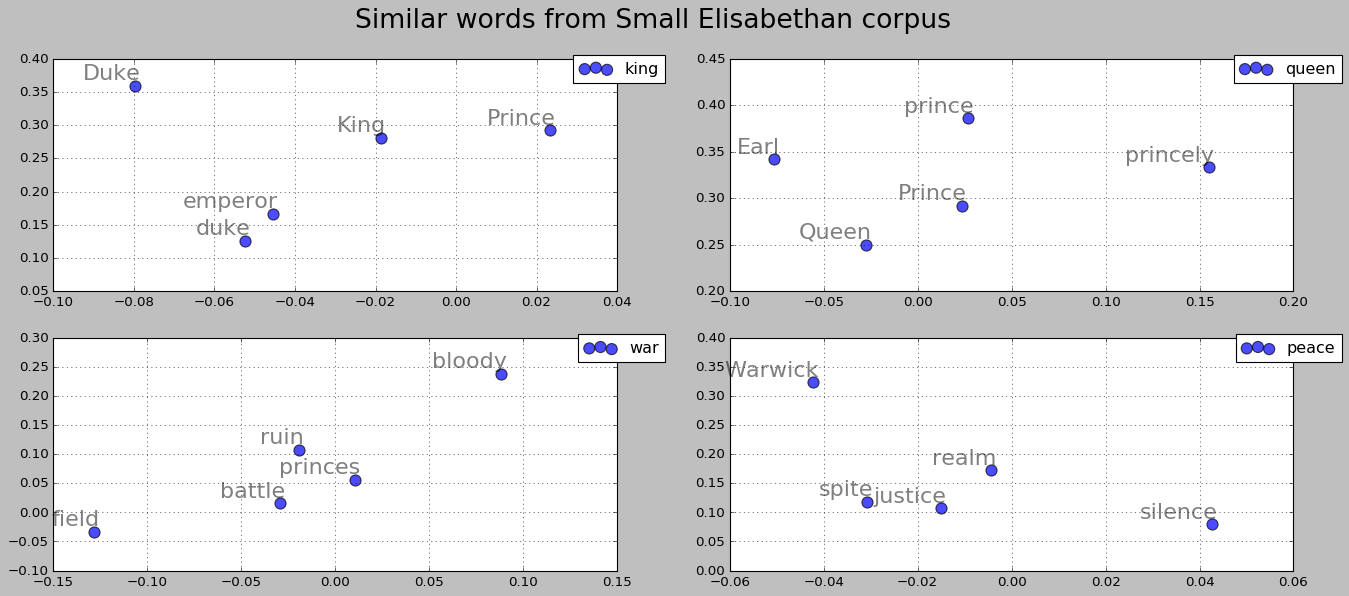

In [40]:
small_list=[["king"], ["queen"], ["war"], ["peace"]]
plot_similar_words(small_list, small_model, 'Similar words from Small Elisabethan corpus', 'similar_words_small_model.png')

# Making a GIF with word embbedings 

## GIF with 3d vector space

In [19]:

    
def get_3d_gif(model, titel, gif_name):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    _, _, _, wp_fitted_tsne, _, _, _  = get_embeddings(model, 3)   

    x_values = wp_fitted_tsne[:,0]
    y_values = wp_fitted_tsne[:,1]
    z_values = wp_fitted_tsne[:,2]

    plt.scatter(x_values, 
                y_values, 
                z_values, alpha=0.7)

    plt.title(titel)

    temp_dir = tempfile.mkdtemp()
    images = []
    for angle in range(0, 360, 10):
        ax.view_init(30, angle)
        fname = os.path.join(temp_dir, str(angle) + '.png')
        plt.savefig(fname, dpi=120, format='png', bbox_inches='tight')
        images.append(imageio.imread(fname))
    imageio.mimsave(str(gif_name)+'.gif', images)
    shutil.rmtree(temp_dir)
    
    Image(str(gif_name)+'.gif')
    


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


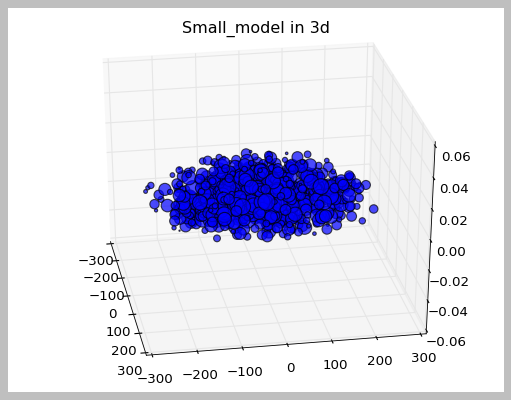

In [23]:
get_3d_gif(small_model, "Small_model in 3d", "Small_model_gif")


 # Let's look at our models 

## 2d Word Embeddings of entire corpus

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


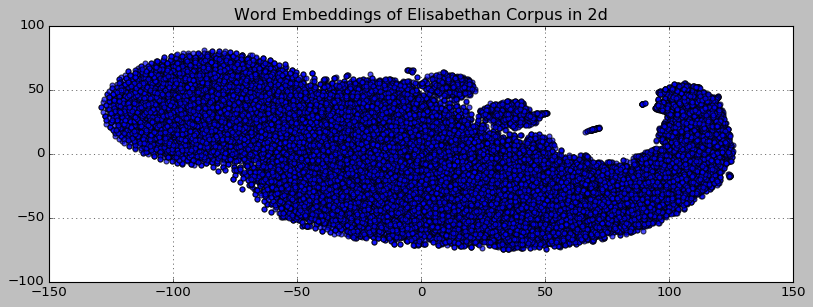

In [ ]:
visualise_word_embeddings_2d(trained_model, "2d_plays", "Word Embeddings of Elisabethan Corpus in 2d")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


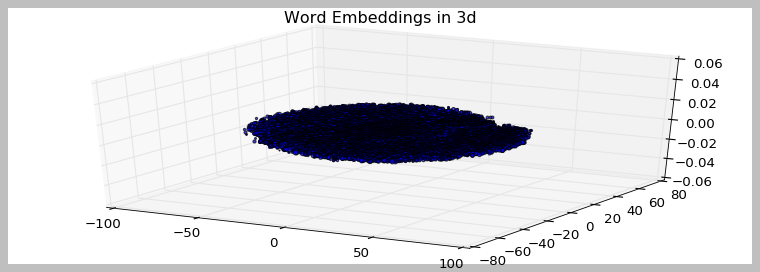

In [20]:
visualise_word_embeddings_3d(trained_model, "3d_trained_model", "Word Embeddings in 3d space of Elisabethan Corpus")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


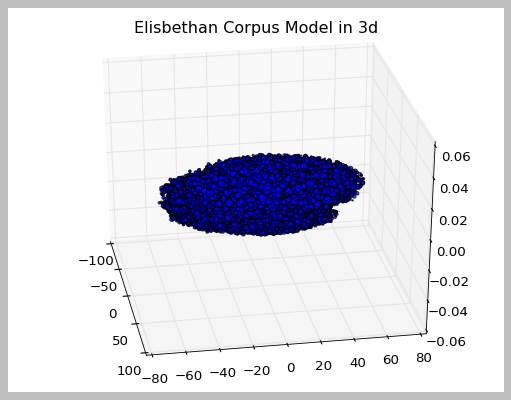

In [21]:
get_3d_gif(trained_model, "Elisbethan Corpus Model in 3d", "trained_3d_gif")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


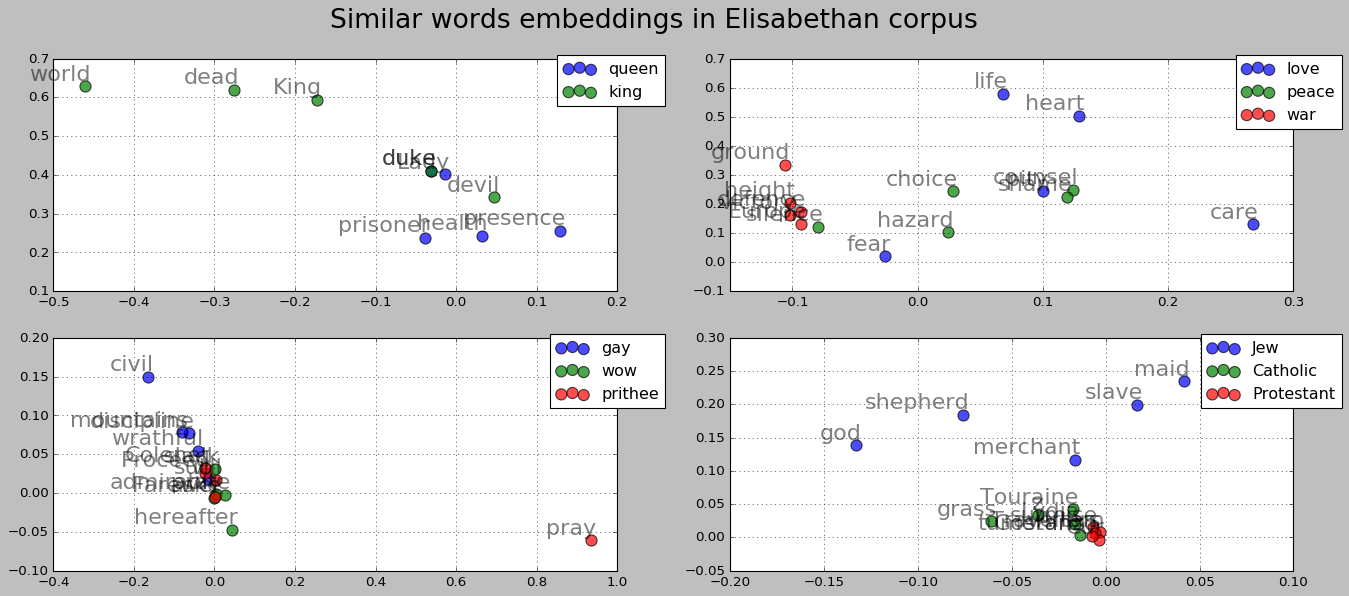

In [32]:
plot_similar_words(list_of_listswords, trained_model, 'Similar words embeddings in Elisabethan corpus', 'similar_words_trained_model.png')